In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("C:/Users/aniru/Desktop/Project/MLops project/Hotel reservation system/DATASET/Hotel Reservations.csv/Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.shape

(36275, 19)

In [5]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [9]:
for i in df.columns:
    print(f"========= {i} =========")
    print(f"{df[i].value_counts()}")
    print("\n")
print("\n")

========= Booking_ID =========
Booking_ID
INN36275    1
INN00001    1
INN00002    1
INN36259    1
INN36258    1
           ..
INN00008    1
INN00007    1
INN00006    1
INN00005    1
INN00004    1
Name: count, Length: 36275, dtype: int64


========= no_of_adults =========
no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64


========= no_of_children =========
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64


========= no_of_weekend_nights =========
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64


========= no_of_week_nights =========
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64


====

##### Our data is imbanlced

In [10]:
cat_col = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights',  'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']


#### DATA ANALYSIS

In [11]:
data = df.copy()

data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


##### Univariate Analysis

In [12]:
def num_plot_dist(df, num_features):
    fig, ax = plt.subplots(len(num_features),2,figsize = (15,len(num_features)*5))

    if len(num_features) == 1:
        ax = [ax]

    for i,col in enumerate(num_features):
        sns.histplot(data= df, x=col , ax = ax[i][0], kde = True, palette= "tab10")
        ax[i][0].set_title(f" Histogram for {col}")
        
        sns.boxplot(data = df, x = col , ax = ax[i][1], palette="tab10" )
        ax[i][1].set_title(f" Boxplot for {col}")

    plt.tight_layout()
    plt.show()

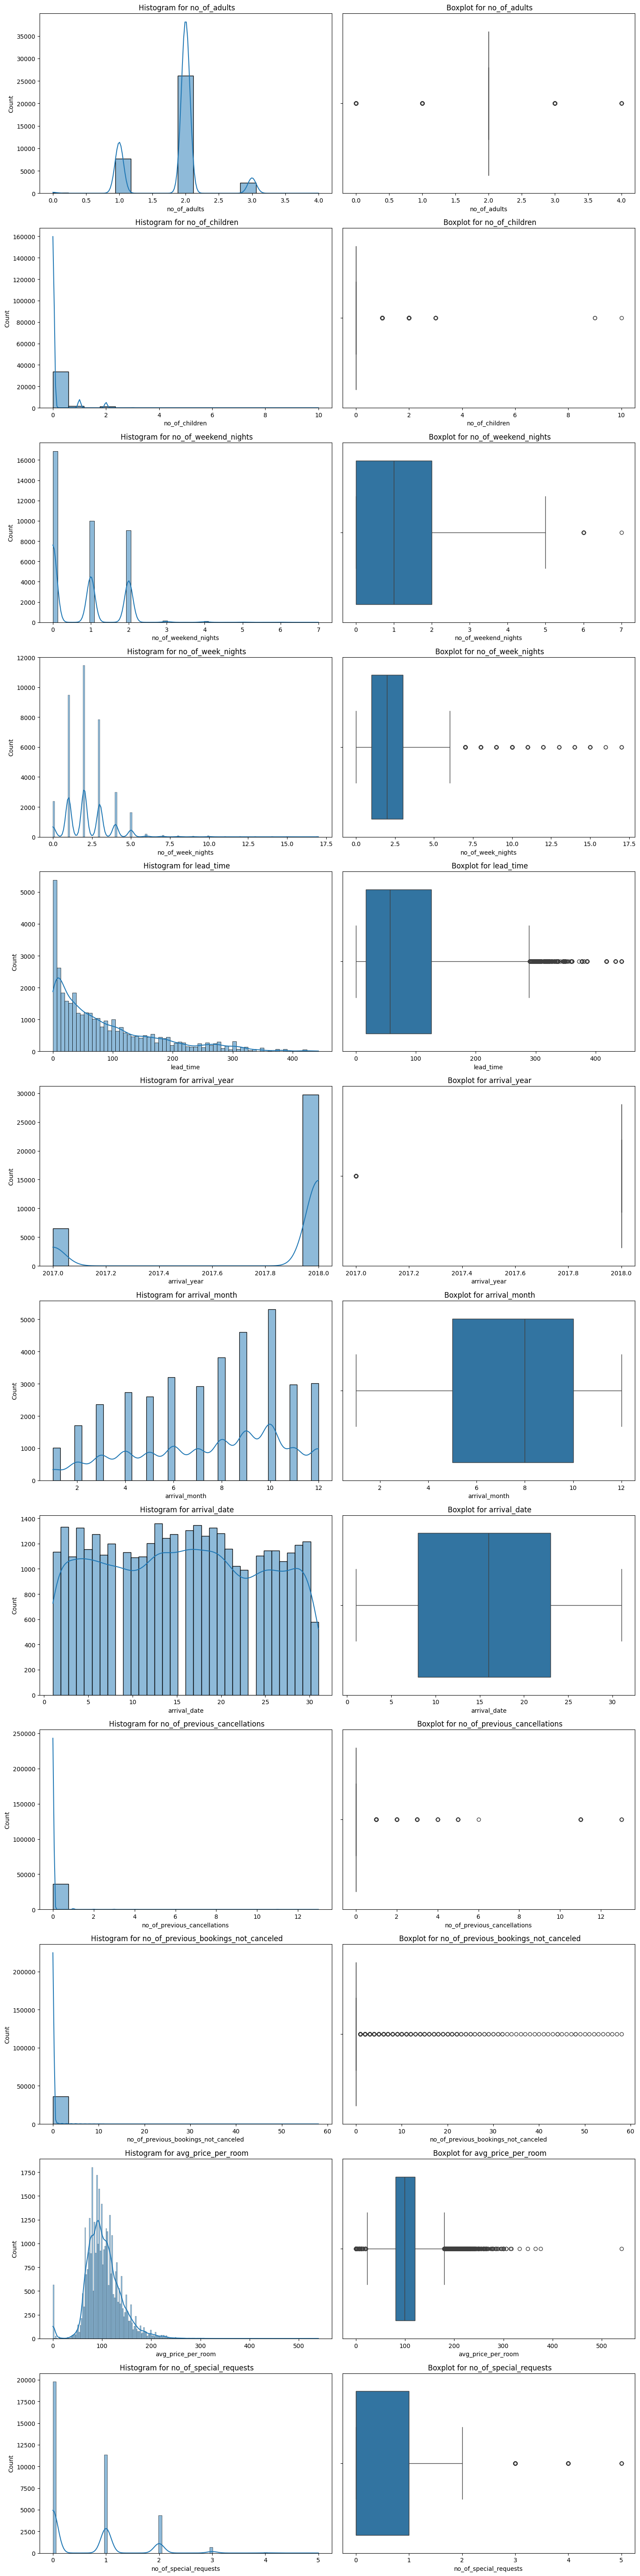

In [13]:
num_plot_dist(data, num_cols)

In [14]:
def cat_plot_dist(df, num_features):
    for col in num_features:
        plt.figure(figsize=(10,6))
        df[col].value_counts().plot(kind= "bar",color = "tan")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=0)
        plt.title(f"{col} distribution")
    plt.tight_layout()
    plt.show()

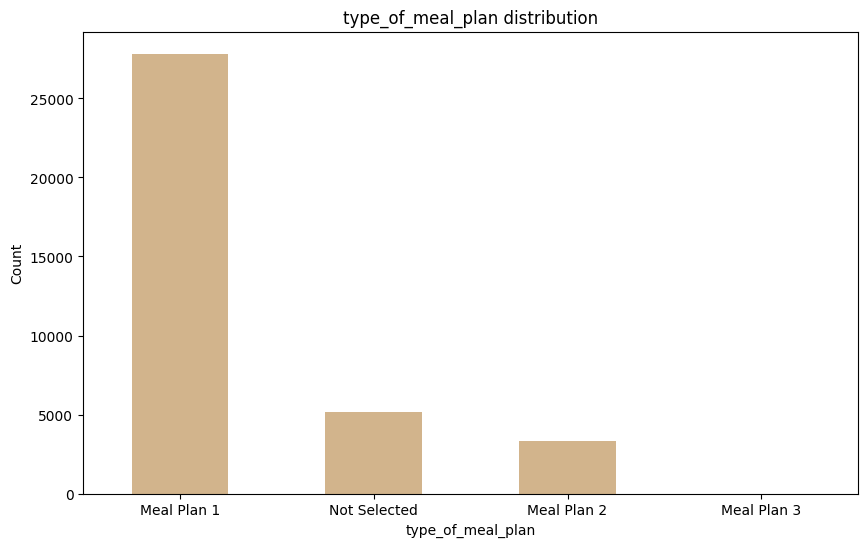

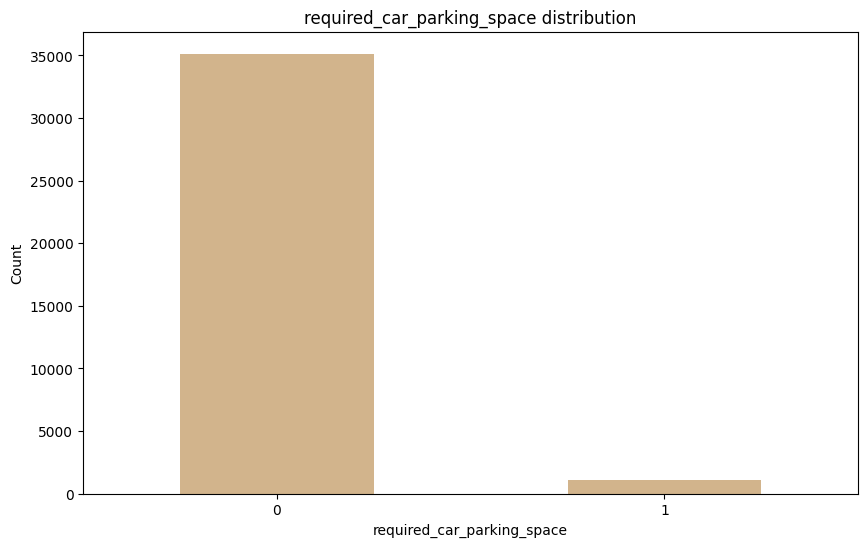

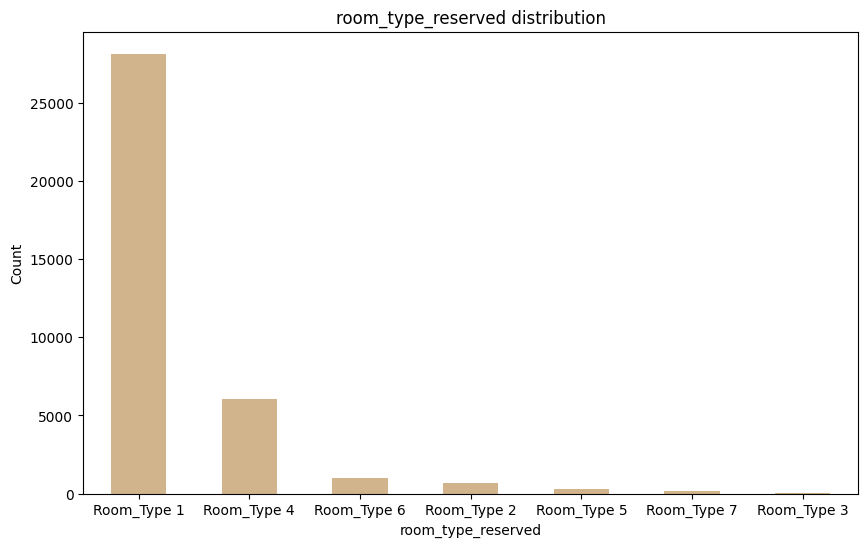

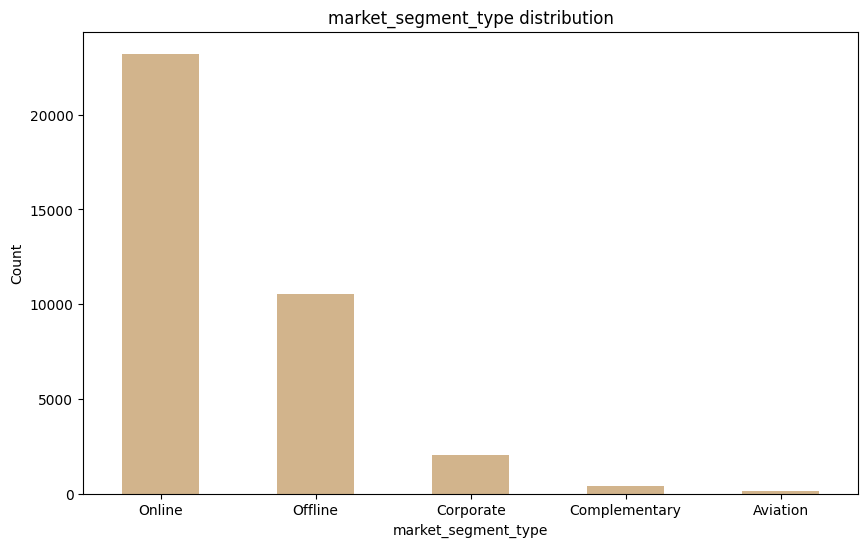

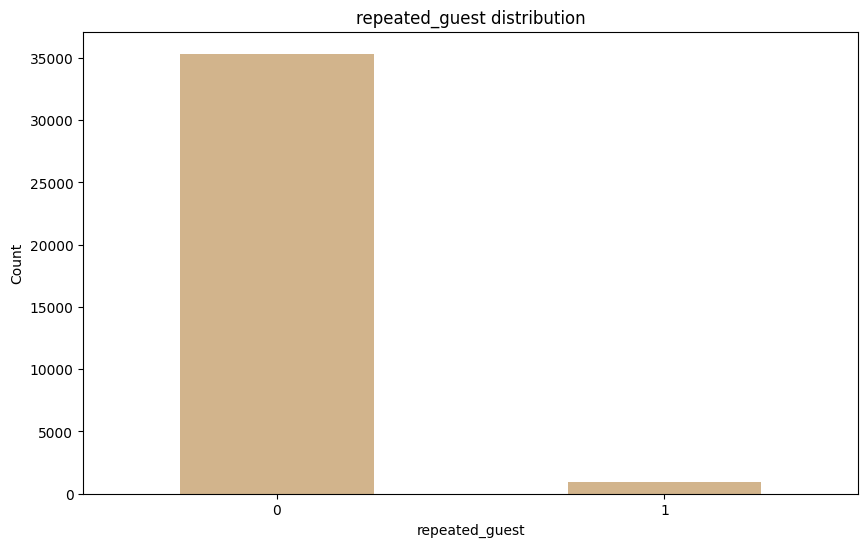

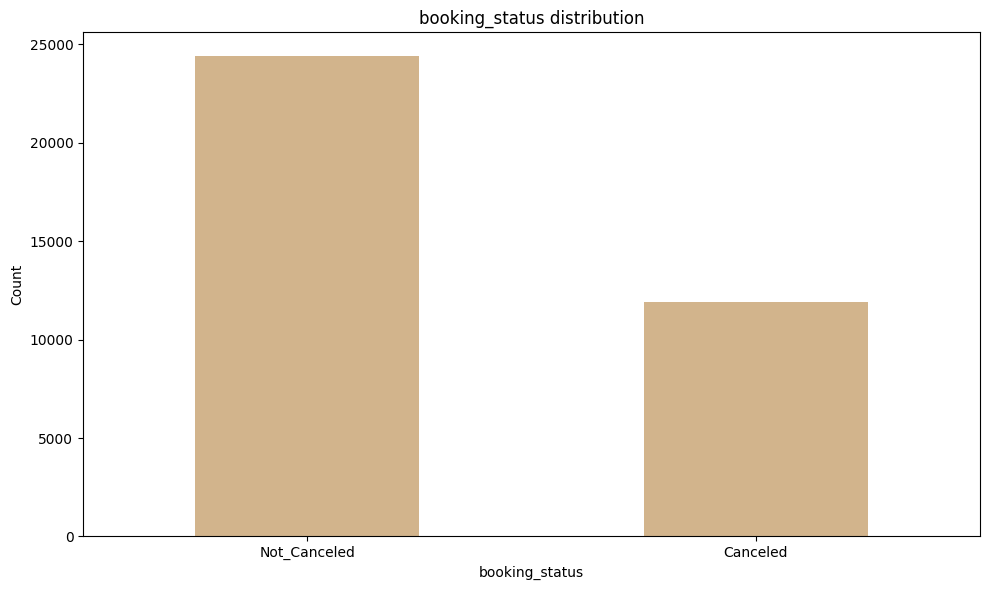

In [15]:
cat_plot_dist(data,cat_col)

##### Bivariate Analysis 

In [16]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, ax = plt.subplots(num_rows,2,figsize =(15,num_rows*5))
    ax = ax.flatten()

    for i, col in enumerate(num_features):
        sns.boxplot(x=target, y =col , ax =ax[i] , data =df , palette= "tab10")
        ax[i].set_title(f"{col} Vs {target}")
    
    plt.tight_layout()
    plt.show()
        

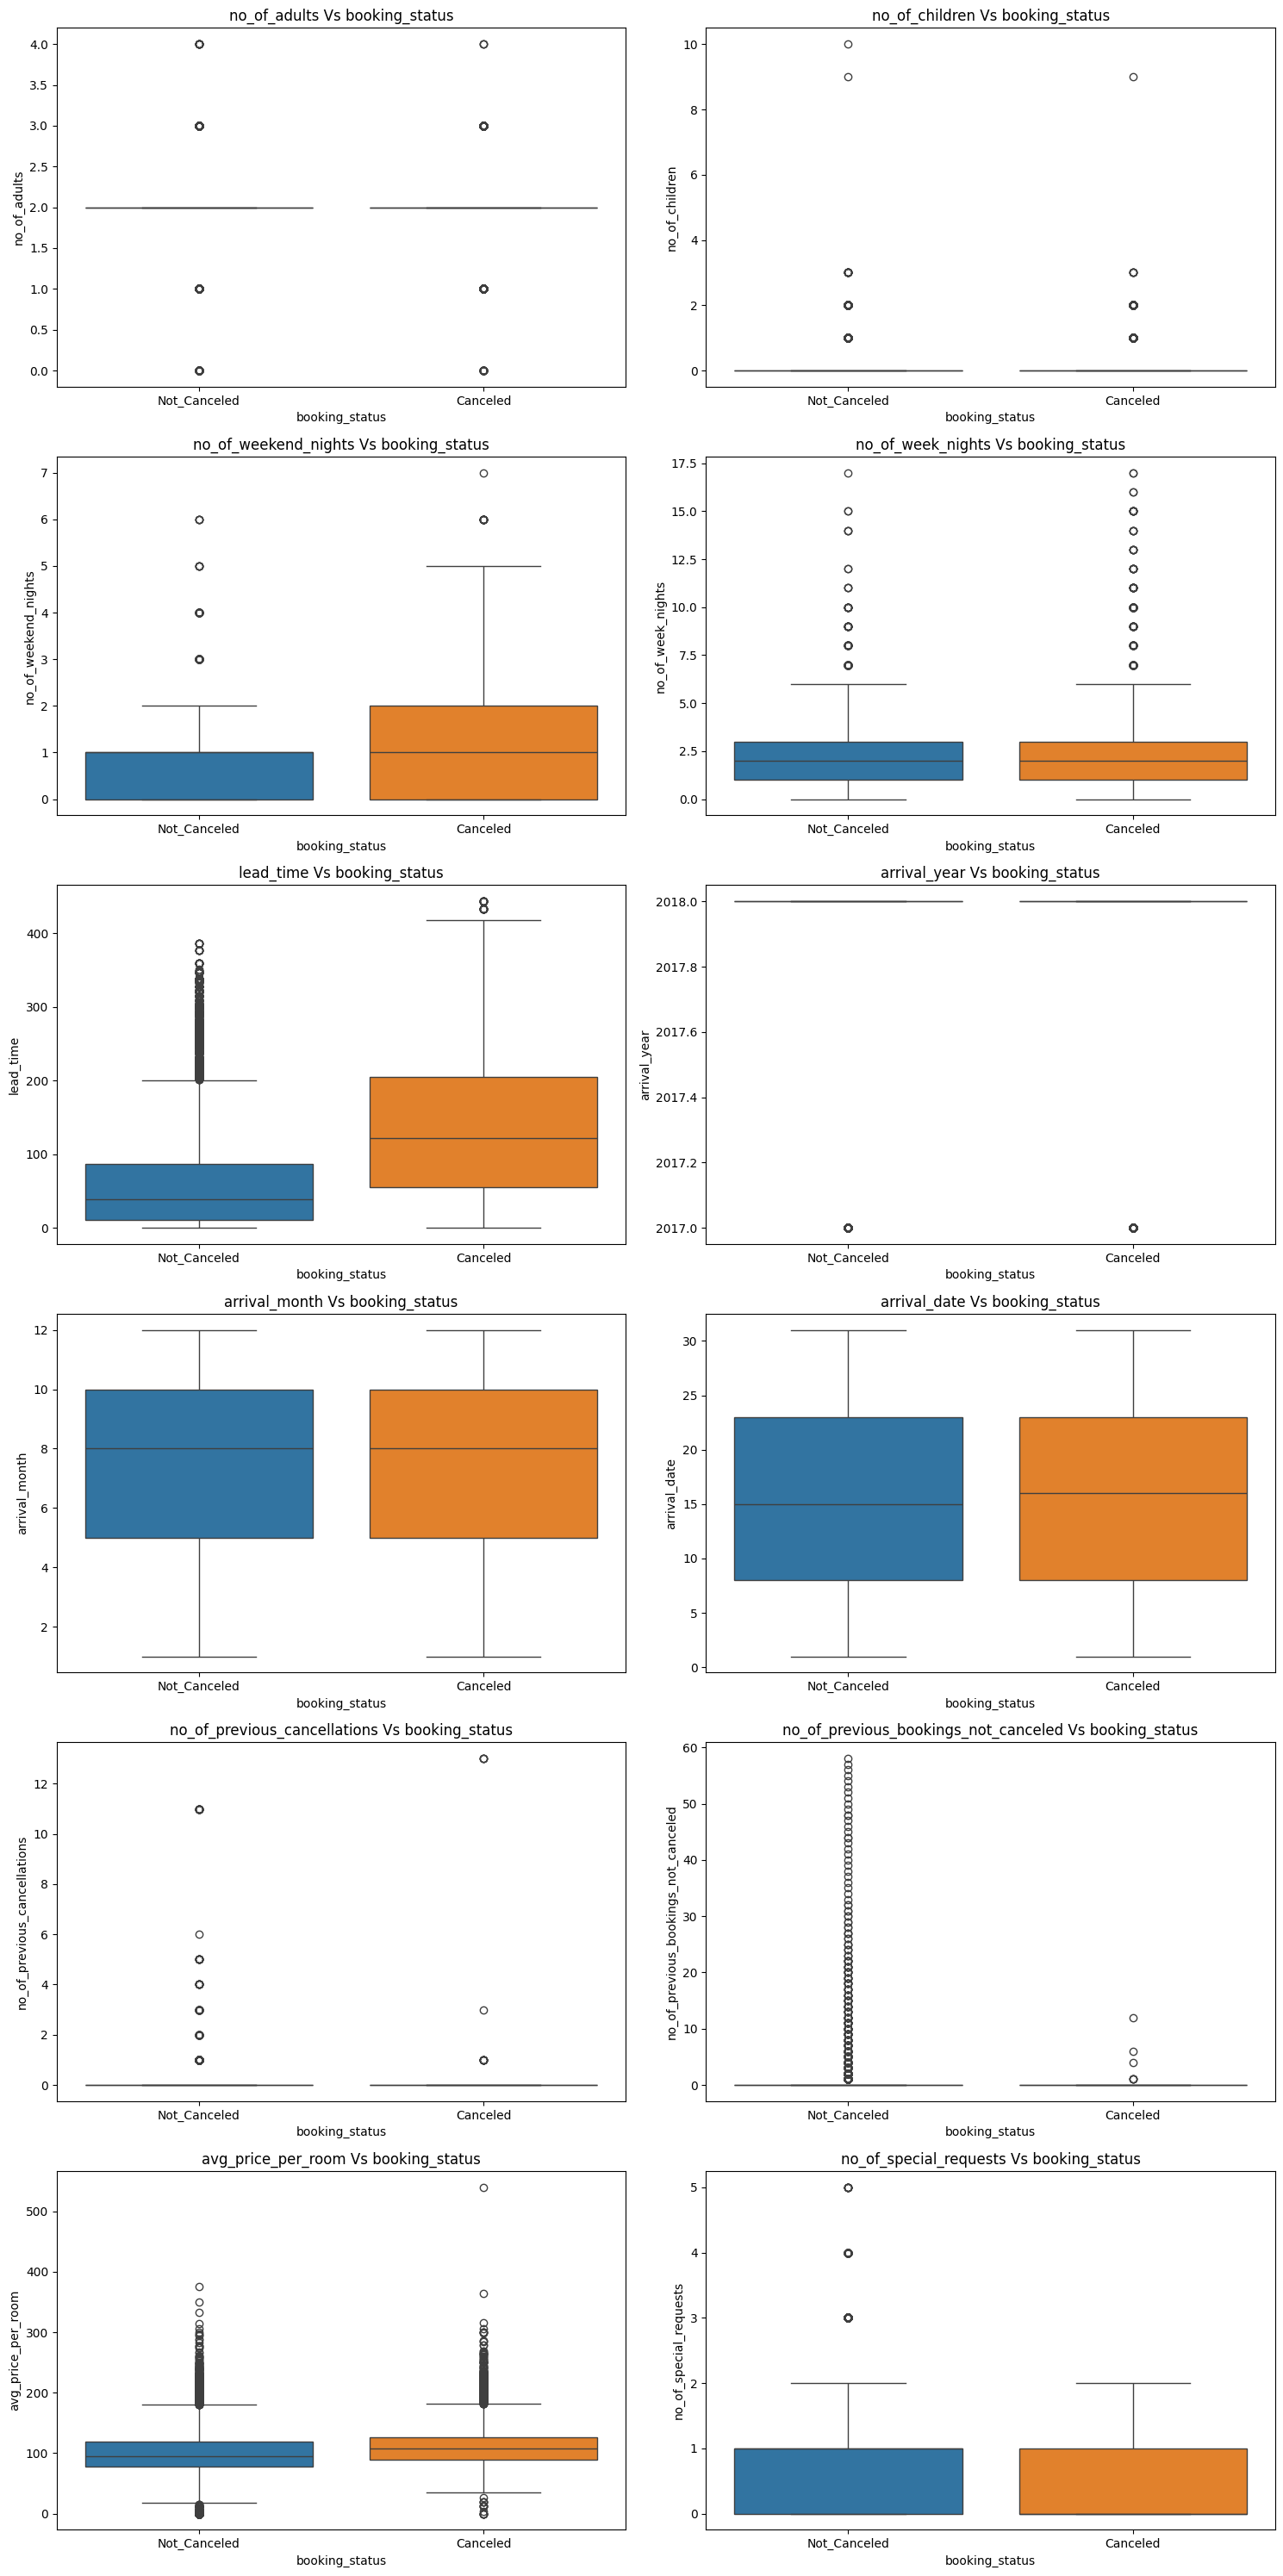

In [17]:
plot_bivariate_num(data, "booking_status", num_cols)

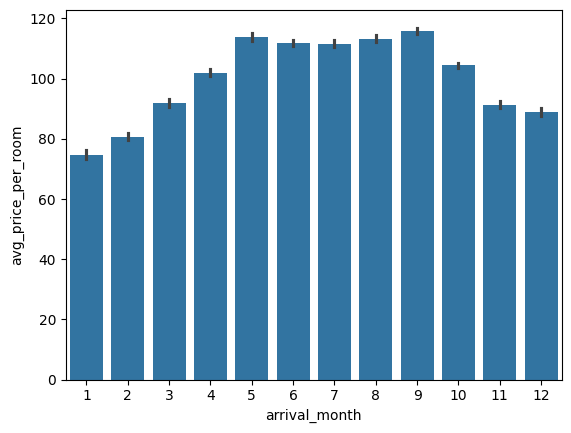

In [18]:
sns.barplot(x = "arrival_month", y = "avg_price_per_room", data = data)
plt.show()

In [19]:
def plot_bivariate_cat(df, target, cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots+1)//2

    fig, ax = plt.subplots(num_rows,2,figsize =(15,num_rows*5))
    ax = ax.flatten()

    for i, col in enumerate(cat_features):
        sns.countplot(x=col, hue= target , ax =ax[i] , data =df , palette= "Set2")
        ax[i].set_title(f"{col} Vs {target}")
        ax[i].tick_params(axis='x', rotation = 30)
        
    plt.tight_layout()
    plt.show()

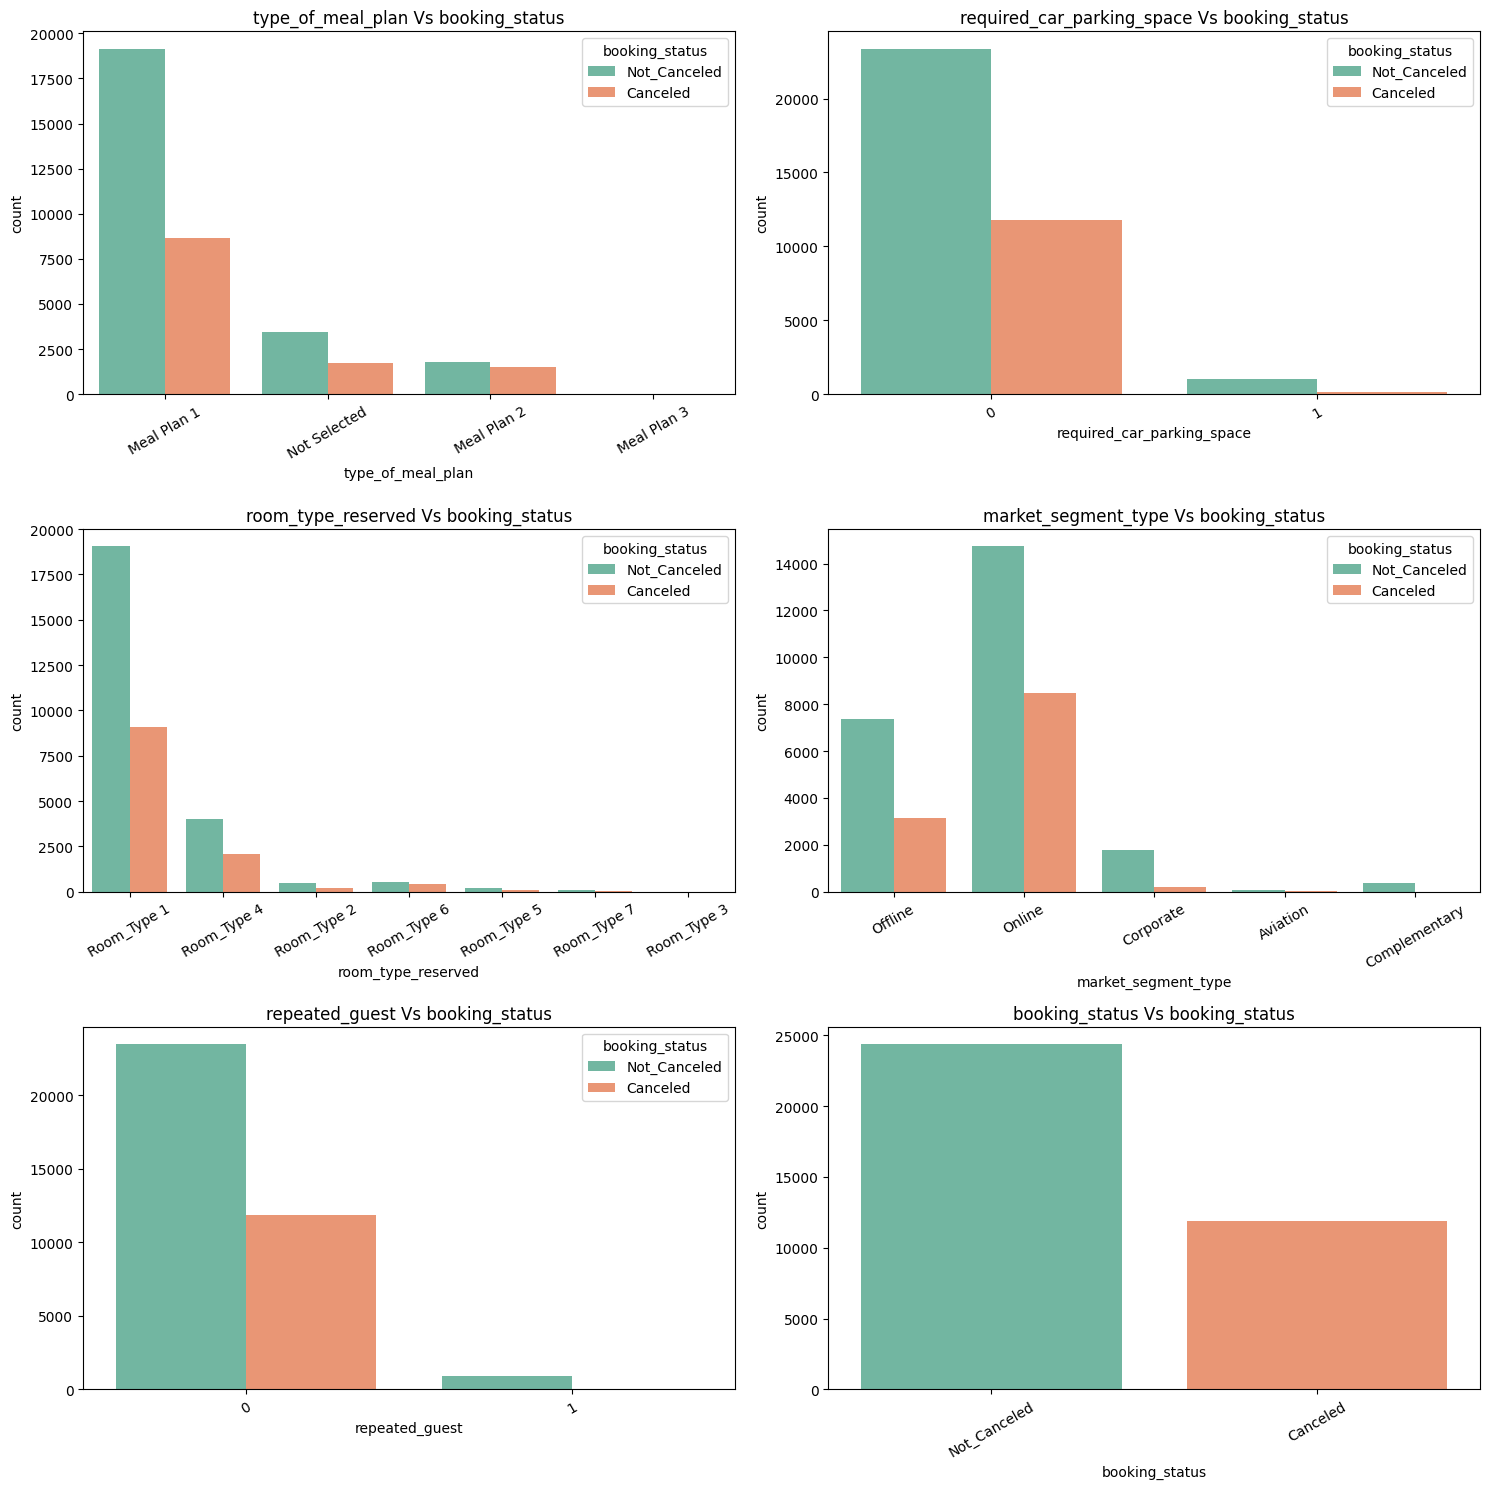

In [20]:
plot_bivariate_cat(data,"booking_status", cat_col)

#### Data Processing 

In [21]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [23]:
### Label encoding 

from sklearn.preprocessing import LabelEncoder

In [24]:
labelencoder = LabelEncoder()

mapping = {}

for col in cat_col:
    data[col] = labelencoder.fit_transform(data[col])

    mapping[col] = {label: code for label,code in zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_))}
    


In [25]:
for label,code in mapping.items():
    print(f"=========={label}===========")
    for c,k in code.items():
        print(f"{c} : {k}")
    print("\n")

==========type_of_meal_plan===========
Meal Plan 1 : 0
Meal Plan 2 : 1
Meal Plan 3 : 2
Not Selected : 3


==========required_car_parking_space===========
0 : 0
1 : 1


==========room_type_reserved===========
Room_Type 1 : 0
Room_Type 2 : 1
Room_Type 3 : 2
Room_Type 4 : 3
Room_Type 5 : 4
Room_Type 6 : 5
Room_Type 7 : 6


==========market_segment_type===========
Aviation : 0
Complementary : 1
Corporate : 2
Offline : 3
Online : 4


==========repeated_guest===========
0 : 0
1 : 1


==========booking_status===========
Canceled : 0
Not_Canceled : 1




In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  int64  
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  int64  
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [27]:
data.drop(columns=["Booking_ID"],inplace=True)

In [28]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


#### Multicollinearity 

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [35]:
X = add_constant(data)

vif_data = pd.DataFrame()

vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]



In [36]:
vif_data

,feature,VIF
0,const,3.593919e+07
1,no_of_adults,1.293487e+00
2,no_of_children,1.257270e+00
3,no_of_weekend_nights,1.064807e+00
4,no_of_week_nights,1.089508e+00
5,type_of_meal_plan,1.155803e+00
6,required_car_parking_space,1.033166e+00
7,room_type_reserved,1.532264e+00
8,lead_time,1.442987e+00
9,arrival_year,1.300423e+00


##### Our data doesn't have any Mulitcollinearity 

In [43]:
corr = data.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.025555,0.011429,0.270348,0.097287,0.076719,0.021841,0.026338,0.314103,-0.192277,-0.047426,-0.119166,0.296886,0.189401,-0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.086764,0.034244,0.364073,-0.047091,0.045983,-0.003076,0.025482,0.130618,-0.036348,-0.016390,-0.021189,0.337728,0.124486,-0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.027327,-0.031111,0.057368,0.046595,0.055357,-0.009894,0.027304,0.129069,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,-0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.083431,-0.048784,0.094125,0.149650,0.032672,0.037376,-0.009305,0.112952,-0.099764,-0.030080,-0.049344,0.022753,0.045994,-0.092996
type_of_meal_plan,0.025555,-0.086764,-0.027327,-0.083431,1.000000,-0.012991,-0.209176,-0.060271,0.071396,0.008564,0.004833,0.203361,-0.062995,-0.011622,-0.038183,-0.069257,0.022091,-0.026706
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,-0.012991,1.000000,0.038778,-0.066445,0.015684,-0.015505,-0.000037,-0.003723,0.110909,0.027106,0.063810,0.061304,0.087922,0.086185
room_type_reserved,0.270348,0.364073,0.057368,0.094125,-0.209176,0.038778,1.000000,-0.107793,0.103369,-0.005967,0.032919,0.156610,-0.025826,-0.007936,-0.008139,0.469899,0.145041,-0.022986
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.060271,-0.066445,-0.107793,1.000000,0.143439,0.136814,0.006479,-0.006933,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,-0.438538
arrival_year,0.076719,0.045983,0.055357,0.032672,0.071396,0.015684,0.103369,0.143439,1.000000,-0.339689,0.018849,0.150027,-0.018175,0.003919,0.026422,0.178605,0.053205,-0.179529
arrival_month,0.021841,-0.003076,-0.009894,0.037376,0.008564,-0.015505,-0.005967,0.136814,-0.339689,1.000000,-0.042780,-0.006311,0.000341,-0.038615,-0.010718,0.054423,0.110552,0.011233


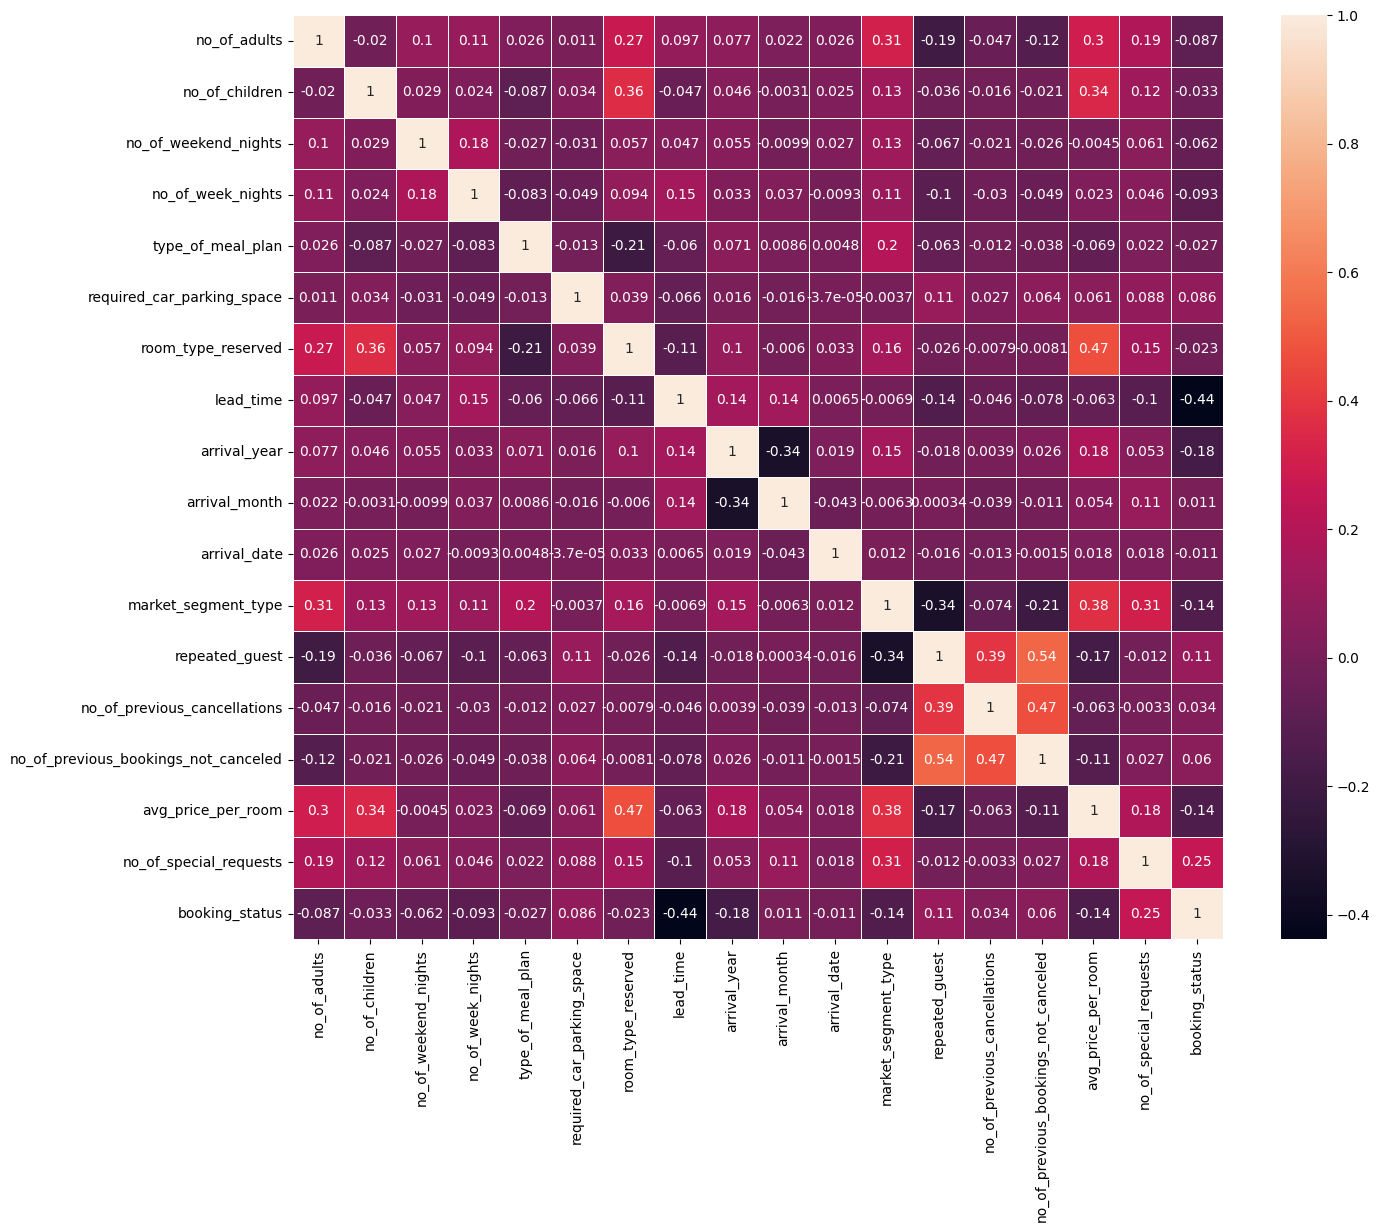

In [45]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot= True, linewidths= 0.5 )
plt.show()

#### Skewness 

In [48]:
skewness = data.skew()
skewness

no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
type_of_meal_plan                        1.801398
required_car_parking_space               5.413643
room_type_reserved                       1.729018
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
market_segment_type                     -1.684871
repeated_guest                           6.002888
no_of_previous_cancellations            14.568081
no_of_previous_bookings_not_canceled     8.921569
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
booking_status                          -0.734507
dtype: float64

In [47]:
for col in data.columns:
    if skewness[col] > 5:
        data[col] = np.log1p(data[col])

##### Imbalanced Data 

In [50]:
data['booking_status'].value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [51]:
X = data.drop(columns="booking_status")
y = data["booking_status"]

X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [54]:
y.value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X,y)

In [61]:
y_res.value_counts()

booking_status
1    24390
0    24390
Name: count, dtype: int64

In [62]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res

balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0.0,0,224,2017,10,2,3,0.0,0.0,0.0,65.00,0,1
1,2,0,2,3,3,0.0,0,5,2018,11,6,4,0.0,0.0,0.0,106.68,1,1
2,1,0,2,1,0,0.0,0,1,2018,2,28,4,0.0,0.0,0.0,60.00,0,0
3,2,0,0,2,0,0.0,0,211,2018,5,20,4,0.0,0.0,0.0,100.00,0,0
4,2,0,1,1,3,0.0,0,48,2018,4,11,4,0.0,0.0,0.0,94.50,0,0


In [63]:
balanced_df.shape

(48780, 18)

In [64]:
df = balanced_df.copy()

In [65]:
len(df.columns)

18

#### Feature selection

In [66]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns="booking_status")
y = df["booking_status"]

In [67]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [68]:
feature_importance = model.feature_importances_

feature_importances_df = pd.DataFrame({
    'feature' : X.columns,
    'importance': feature_importance
})

In [71]:
top_feature_df = feature_importances_df.sort_values(by= "importance", ascending= False)

In [73]:
top_10_features = top_feature_df['feature'].head(10).values

top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [75]:
len(top_10_df.columns)

11

In [76]:
df = top_10_df.copy()

##### Model Selection

In [ ]:
!pip install xgboost lightgbm

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, f1_score

In [92]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [93]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2, random_state= 42)

In [97]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state= 42),
    "Logistic Regression": LogisticRegression(random_state= 42),
    "Gradient Boosting":GradientBoostingClassifier(random_state= 42) ,
    "SVC":SVC(random_state= 42),
    "Decision Tree":DecisionTreeClassifier(random_state= 42),
    "GaussianNB":GaussianNB(),
    "KNeighbors":KNeighborsClassifier(),
    "XGB":XGBClassifier(random_state= 42),
    "AdaBoost":AdaBoostClassifier(random_state=42),
    "LGBM":LGBMClassifier(random_state= 42)
}

In [98]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Recall":[],
    "Precision":[],
    "F1 Score":[]
}

In [99]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)



    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

In [100]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Recall,Precision,F1 Score
0,Random Forest,0.918614,0.928366,0.910427,0.919309
1,Logistic Regression,0.787720,0.791667,0.785060,0.788350
2,Gradient Boosting,0.838253,0.844622,0.833671,0.839111
3,SVC,0.686859,0.790435,0.654376,0.715999
4,Decision Tree,0.884276,0.877053,0.889652,0.883307
5,GaussianNB,0.755740,0.724343,0.772379,0.747590
6,KNeighbors,0.830566,0.792898,0.857111,0.823755
7,XGB,0.895961,0.906609,0.887482,0.896944
8,AdaBoost,0.776855,0.802135,0.763132,0.782148
9,LGBM,0.884379,0.902915,0.870400,0.886359


In [101]:
##### Train Random Forest Model 

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [103]:

X = df.drop(columns="booking_status")
y = df["booking_status"]
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2, random_state= 42)

In [104]:
rf = RandomForestClassifier(random_state=42)

In [105]:
params_dist = {
    'n_estimators' : randint(100,500),
    'max_depth':randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5),
    'bootstrap': [True,False]
}

In [106]:
random_search = RandomizedSearchCV(
    estimator= rf,
    param_distributions= params_dist,
    n_iter=5,
    cv = 5,
    verbose= 2,
    random_state= 42,
    scoring= 'accuracy'
)

In [107]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.3s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A3A8838210>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A3A7902A90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A3A7903010>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A3A8361F10>},
                   random_state=42, scoring='accuracy', verbose=2)

In [111]:
results_random_df = pd.DataFrame(random_search.cv_results_)
results_random_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.856245,0.136762,0.197873,0.019900,True,38,3,4,171,"{'bootstrap': True, 'max_depth': 38, 'min_samp...",0.903139,0.906983,0.901730,0.899936,0.902486,0.902855,0.002326,3
1,8.329148,0.553383,0.349188,0.020231,True,30,3,3,314,"{'bootstrap': True, 'max_depth': 30, 'min_samp...",0.902370,0.905573,0.901602,0.900320,0.903383,0.902650,0.001771,4
2,4.735773,0.092982,0.201753,0.013238,True,20,4,6,199,"{'bootstrap': True, 'max_depth': 20, 'min_samp...",0.897630,0.902883,0.896477,0.895964,0.899411,0.898473,0.002503,5
3,15.107718,0.829273,0.493912,0.019453,False,33,3,7,408,"{'bootstrap': False, 'max_depth': 33, 'min_sam...",0.911980,0.910058,0.908264,0.904805,0.907483,0.908518,0.002420,1
4,15.876230,0.454304,0.503447,0.032668,False,33,4,7,393,"{'bootstrap': False, 'max_depth': 33, 'min_sam...",0.906855,0.908520,0.905061,0.902755,0.906074,0.905853,0.001918,2


In [112]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [113]:
best_rf_model = random_search.best_estimator_

In [114]:
y_pred = best_rf_model.predict(X_test)

In [115]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [116]:
accuracy,precision,recall,f1

(0.914309143091431, 0.9040849018822588, 0.9267241379310345, 0.9152645449016825)

In [117]:
###### Save this model

import joblib

joblib.dump(best_rf_model,"random_forest_best.pkl")

['random_forest_best.pkl']

In [118]:
loaded_model = joblib.load("random_forest_best.pkl")

In [ ]:
X_train[0:1],y_train[0:1]

(       lead_time  avg_price_per_room  no_of_special_requests  arrival_month  \
 19174        113               100.0                       0              5   
 
        arrival_date  market_segment_type  no_of_week_nights  \
 19174            31                    2                  3   
 
        no_of_weekend_nights  arrival_year  no_of_adults  
 19174                     0          2018             1  ,
 19174    0
 Name: booking_status, dtype: int64)

In [151]:
new_data = np.array(X_train.iloc[0].values.tolist()).reshape(1,-1)


In [152]:
predictions  = loaded_model.predict(new_data)

In [153]:
predictions

array([0])